# 任务一 数据预处理与分析

## 任务1.1 根据附件1中的数据，提取每台售货机对应的销售数据，保存在CSV文件中，文件名分别为“task1-1A.csv”、“task1-1B.csv”、...、“task1-1E.csv”

In [1]:
!pip install chardet

In [2]:
import chardet

with open('data1.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

GB2312


In [3]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('data1.csv',encoding = "GB2312")

location_list = data['地点'].unique()

location_list.sort()

for location in location_list:
    # 根据特定元素进行筛选
    selected_data = data[data['地点'] ==location]

    # 将筛选后的数据保存到新的CSV文件
    selected_data.to_csv(f'task1-1{location}.csv',encoding = "GB2312", index=False)

## 任务1.2 计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量，以表格形式体现在报告中。

In [4]:
# 将支付时间列转换为日期时间类型，处理无效日期
data['DateTime'] = pd.to_datetime(data['支付时间'], errors='coerce')

In [5]:
# 筛选出2017年5月的数据
may_2017_data = data[(data['DateTime'].dt.year == 2017) & (data['DateTime'].dt.month == 5)]

print(may_2017_data)

                                  订单号             设备ID  应付金额  实际金额  \
7045   DD2017081674930598278687133911  E43A6E078A04228  10.0  10.0   
7046    DD2017071918075974A794CB8C5B1  E43A6E078A04134   4.0   4.0   
7047    DD201708167493963381910837362  E43A6E078A06874   3.0   3.0   
7048   DD2017081674930598730566838537  E43A6E078A04134  20.0  20.0   
7049   DD2017081674930598972927113082  E43A6E078A04134   2.5   2.5   
...                               ...              ...   ...   ...   
11310   DD201708167493190033718834059  E43A6E078A06874   5.8   5.8   
11311   DD201708167493190049237893919  E43A6E078A04228  16.0  16.0   
11312   DD201708167493994546206855673  E43A6E078A04134   6.0   6.0   
11313   DD2017071509504587AA526858A3C  E43A6E078A06874   3.0   3.0   
11314   DD201708167493190193775419736  E43A6E078A04172   5.0   5.0   

                 商品             支付时间 地点      状态   提现            DateTime  
7045   85g统一老坛酸菜牛肉面    2017/5/1 0:02  C  已出货未退款  已提现 2017-05-01 00:02:00  
7046     

In [6]:
# 计算每台售货机2017年5月份的交易额和订单量
machine_sales = may_2017_data.groupby('地点').agg({'实际金额': 'sum', '地点': 'count'})
machine_sales.columns = ['交易额', '订单量']

In [65]:
# 计算所有售货机的总交易额和订单量
total_sales = machine_sales['交易额'].sum()
total_orders = machine_sales['订单量'].sum()
machine_sales.to_csv('machine_sales.csv',encoding = "GB2312", index=False)
# 打印每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量
print(machine_sales)
print("所有售货机交易总额:", total_sales)
print("订单总量:", total_orders)

       交易额   订单量      毛利率    占总毛利润比
地点                                 
A   3385.1   756  1015.53  0.179231
B   3681.2   869  1104.36  0.194909
C   3729.4   789  1118.82  0.197461
D   2392.1   564   717.63  0.126655
E   5699.0  1292  1709.70  0.301745
所有售货机交易总额: 18886.8
订单总量: 4270


## 任务1.3 计算每台售货机每月的每单平均交易额与日均订单量，以表格形式体现在报告中。

In [64]:
# 计算每笔交易的实际金额
data['每单交易额'] = data['实际金额']

# 提取年份和月份作为新列
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month

# 计算每台售货机每月的每单平均交易额和日均订单量
monthly_stats = data.groupby(['地点', 'Year', 'Month']).agg({'每单交易额': 'mean', '地点': 'count'})
monthly_stats.columns = ['每单平均交易额', '订单量']
monthly_stats.reset_index(inplace=True)

# 计算每个月的天数
days_in_month = monthly_stats.apply(lambda row: pd.Period(year=row['Year'], month=row['Month'], freq='M').days_in_month, axis=1)

# 计算日均订单量
monthly_stats['日均订单量'] = monthly_stats['订单量'] / days_in_month
monthly_stats.to_csv('monthly_stats.csv',encoding = "GB2312", index=False)
# 打印每台售货机每月的每单平均交易额和日均订单量
print(monthly_stats)

   地点    Year  Month   每单平均交易额   订单量       日均订单量
0   A  2017.0    1.0  4.506567   335   10.806452
1   A  2017.0    2.0  3.864035   114    4.071429
2   A  2017.0    3.0  3.585490   255    8.225806
3   A  2017.0    4.0  4.036913   447   14.900000
4   A  2017.0    5.0  4.477646   756   24.387097
5   A  2017.0    6.0  4.047394  1669   55.633333
6   A  2017.0    7.0  4.097689   476   15.354839
7   A  2017.0    8.0  3.358709   666   21.483871
8   A  2017.0    9.0  4.307212  1040   34.666667
9   A  2017.0   10.0  4.020703  1565   50.483871
10  A  2017.0   11.0  4.471552  1160   38.666667
11  A  2017.0   12.0  3.787868  2003   64.612903
12  B  2017.0    1.0  3.753005   366   11.806452
13  B  2017.0    2.0  3.255676   185    6.607143
14  B  2017.0    3.0  3.614717   265    8.548387
15  B  2017.0    4.0  4.075290   603   20.100000
16  B  2017.0    5.0  4.236133   869   28.032258
17  B  2017.0    6.0  4.068050  1856   61.866667
18  B  2017.0    7.0  4.401739   345   11.129032
19  B  2017.0    8.0

# 任务二 数据分析与可视化

## 任务2.1 绘制2017年6六月销量前5的商品销量柱状图

In [9]:
import numpy as np
colors = [
    [204, 51, 133],   # 紫红色
    [235, 128, 114],  # 橙粉色
    [180, 100, 135],  # 浅紫色
    [202, 228, 104],  # 苔藓绿
    [105, 210, 231],  # 沙绿色
    [225, 184, 93],   # 蜜黄色
    [250, 251, 246],  # 米灰色
    [156, 165, 207],  # 淡蓝灰
    [63, 63, 116],    # 靛青色
    [46, 49, 107],    # 黛蓝色
    [33, 26, 42]      # 黑色
]

# 将RGB值转换为0到1之间的小数
colors = np.array(colors) / 255.0

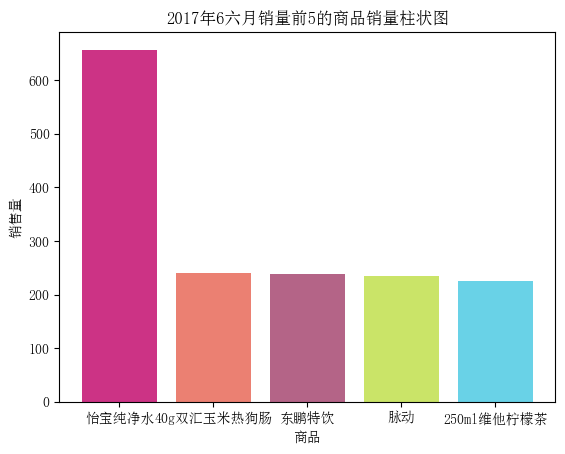

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl


# 设置中文字体为 Windows 系统下的宋体 SimSun 或者微软雅黑 Microsoft YaHei
mpl.rcParams['font.sans-serif'] = ['SimSun']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 筛选出2017年6月的数据
june_2017_data = data[(data['Year'] == 2017) & (data['Month'] == 6)]

# 计算每个商品的销量
product_sales = june_2017_data['商品'].value_counts().head(5)

# 绘制柱状图
plt.bar(product_sales.index, product_sales.values, color=colors)
plt.title('2017年6六月销量前5的商品销量柱状图')
plt.xlabel('商品')
plt.ylabel('销售量')
file_name = f"task2-1.png"
plt.savefig(file_name, format="png")
plt.show()

## 任务2.2 绘制每台售货机每月总交易额折线图及交易额月环比增长柱状图

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 计算每台售货机每月总交易额
monthly_revenue = data.groupby(['地点', 'Year', 'Month']).agg({'每单交易额': 'sum', '地点': 'count'})
monthly_revenue.columns = ['总交易额', '订单量']
monthly_revenue.reset_index(inplace=True)

In [12]:
monthly_revenue

,地点,Year,Month,总交易额,订单量
0,A,2017.0,1.0,1509.7,335
1,A,2017.0,2.0,440.5,114
2,A,2017.0,3.0,914.3,255
3,A,2017.0,4.0,1804.5,447
4,A,2017.0,5.0,3385.1,756
5,A,2017.0,6.0,6755.1,1669
6,A,2017.0,7.0,1950.5,476
7,A,2017.0,8.0,2236.9,666
8,A,2017.0,9.0,4479.5,1040
9,A,2017.0,10.0,6292.4,1565


In [13]:
# 计算总交易额的最大值
max_revenue = monthly_revenue['总交易额'].max()

# 计算总交易额的最小值
min_revenue = monthly_revenue['总交易额'].min()

In [14]:
max_revenue

21501.8

In [15]:
min_revenue

435.5

In [16]:
# 创建自助售货机名称列表
machine_names=[]
for location in location_list:
    machine_names.append(f'自助售货机{location}')
machine_names.sort()

In [17]:
machine_names

['自助售货机A', '自助售货机B', '自助售货机C', '自助售货机D', '自助售货机E']

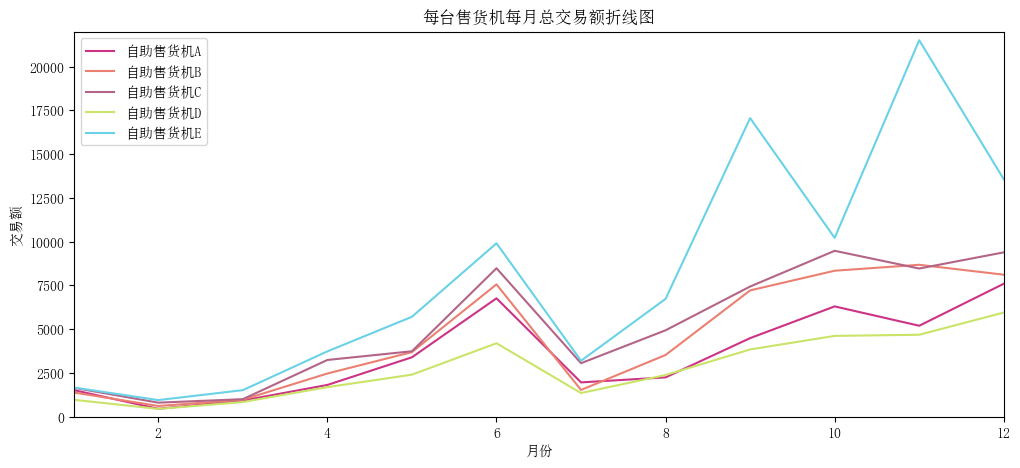

In [71]:
# 绘制每台售货机每月总交易额折线图
plt.figure(figsize=(12, 5))
for name, location,color in zip(machine_names,location_list, colors):
    monthly_data = monthly_revenue[monthly_revenue['地点'] == location]
    plt.plot(monthly_data['Month'], monthly_data['总交易额'], label=name, color=color)

plt.xlim(1, 12)
plt.ylim(0, 22000)

plt.title('每台售货机每月总交易额折线图')
plt.xlabel('月份')
plt.ylabel('交易额')
plt.legend()
file_name = f"task2-2-1.png"
plt.savefig(file_name, format="png")
plt.show()

In [19]:
def calculate_monthly_growth(data):
    monthly_growth = []
    for i in range(1, len(data)):
        if i < len(data) and i-1 >= 0:
            growth_rate = (data['总交易额'].iloc[i] - data['总交易额'].iloc[i-1]) / data['总交易额'].iloc[i-1]
            monthly_growth.append(growth_rate)
    return monthly_growth

In [20]:
monthly_growth_data = {}  # 使用字典来存储月增长数据

for location in location_list:
    mounthly_data = monthly_revenue[monthly_revenue['地点'] == location]
    monthly_growth = calculate_monthly_growth(mounthly_data)
    
    # 将月增长数据存储到字典中
    monthly_growth_data[location] = monthly_growth
    


In [21]:
mounthly_data

,地点,Year,Month,总交易额,订单量
48,E,2017.0,1.0,1656.8,354
49,E,2017.0,2.0,938.7,258
50,E,2017.0,3.0,1507.0,350
51,E,2017.0,4.0,3723.1,895
52,E,2017.0,5.0,5699.0,1292
53,E,2017.0,6.0,9899.7,2593
54,E,2017.0,7.0,3186.4,813
55,E,2017.0,8.0,6722.5,1767
56,E,2017.0,9.0,17054.3,4134
57,E,2017.0,10.0,10208.6,2777


In [22]:
len(monthly_growth)

11

In [23]:
monthly_growth_data

{'A': [-0.7082201761939458,
  1.0755959137343927,
  0.9736410368587992,
  0.8759213078415073,
  0.995539275058344,
  -0.7112551997749849,
  0.14683414509100234,
  1.0025481693414993,
  0.4047103471369572,
  -0.17567223952704847,
  0.46271447850395225],
 'B': [-0.5615171811298777,
  0.5904034534285241,
  1.5654034867940287,
  0.49800602262553906,
  1.0510431381071392,
  -0.7988689191157968,
  1.3153562491768735,
  1.049799493757288,
  0.15599461656931168,
  0.04060444572471065,
  -0.06526026828452454],
 'C': [-0.5172203596464493,
  0.2518939393939394,
  2.260010085728694,
  0.15379141787581593,
  1.271732718399743,
  -0.6403413517150209,
  0.617012897509107,
  0.5077528819613574,
  0.27469376766725007,
  -0.10697276576871495,
  0.10923882838459437],
 'D': [-0.544646591384358,
  0.8982778415614238,
  1.0310874561509615,
  0.4246322434637604,
  0.7503448852472724,
  -0.679770718891808,
  0.768571002386635,
  0.6164551090119342,
  0.20182098040750304,
  0.014478911151149373,
  0.2712800102

In [24]:
# 将 monthly_growth_data 转换为列表
growth_values = [value for value in monthly_growth_data.values()]

In [25]:
len(growth_values[1])

11

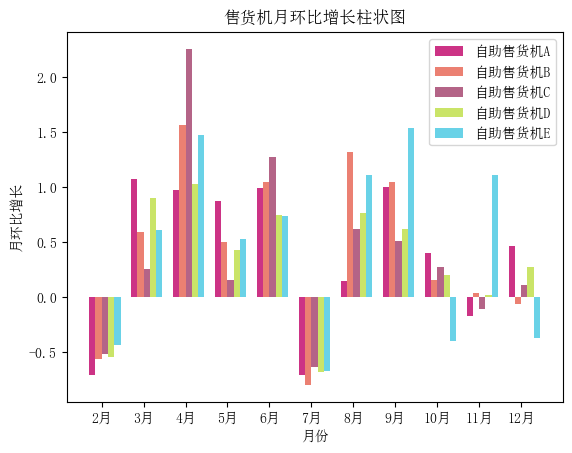

In [72]:
# 绘制柱状图
x = np.arange(1, 12)  # 月份
bar_width = 0.15  # 柱状图宽度
for i,name in zip(range(len(growth_values)),machine_names):
    plt.bar(x + i*bar_width, growth_values[i], width=bar_width, label=name,color=colors[i])

plt.xlabel('月份')
plt.ylabel('月环比增长')
plt.title('售货机月环比增长柱状图')
plt.xticks(x+1.5*bar_width , [str(month+1) + '月' for month in range(1, 12)])  # 设置x轴标签
plt.legend()
file_name = f"task2-2-2.png"
plt.savefig(file_name, format="png")
plt.show()

## 任务2.3 绘制每台售货机毛利润占总毛利润比例的饼图

In [27]:
machine_sales

,交易额,订单量
地点,,
A,3385.1,756
B,3681.2,869
C,3729.4,789
D,2392.1,564
E,5699.0,1292


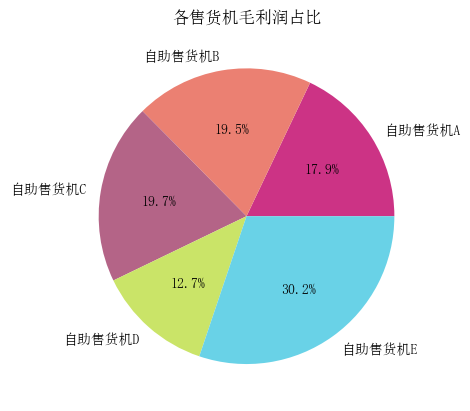

In [73]:
#由于没有销售成本的数据，所以使用每台售货机的销售收入来计算每台售货机毛利润占总毛利润的比例的饼图
#毛利润占比可以通过每台售货机的销售收入与所有售货机销售收入总和的比例来计算。

# 计算每台售货机的毛利润
machine_sales['毛利率'] = machine_sales['交易额'] * 0.3  # 假设毛利率为30%

# 计算总毛利润
total_gross_profit = machine_sales['毛利率'].sum()

# 计算每台售货机毛利润占总毛利润的比例
machine_sales['占总毛利润比'] = machine_sales['毛利率'] / total_gross_profit

# 绘制饼图
plt.pie(machine_sales['占总毛利润比'], labels=machine_names, autopct='%1.1f%%',colors=colors)
plt.title('各售货机毛利润占比')
file_name = f"task2-3.png"
plt.savefig(file_name, format="png")
plt.show()

## 任务2.4 绘制每月交易额均值气泡图，横轴为时间，纵轴为商品二级类目

In [29]:
days_in_month=[31,28,31,30,31,30,31,31,30,31,30,31]

In [30]:
import pandas as pd

# 原商品数据为data
data_sum = data.groupby(['商品', 'Month'])['实际金额'].sum().reset_index()
# 读取商品信息表格
product_data = pd.read_csv('data2.csv', encoding="GB2312")

# 根据商品名称将两个数据集合并
merged_data = pd.merge(data_sum, product_data, on='商品', how='left')

merged_data_sum = merged_data.groupby(['二级类','Month'])['实际金额'].sum().reset_index()

# 创建包含所有月份的完整列表
all_months =[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]
# 扩展merged_data_sum数据框，填充缺失的月份并用零填充实际金额
expanded_data = []
for category in merged_data_sum['二级类'].unique():
    category_data = merged_data_sum[merged_data_sum['二级类'] == category]
    for month in all_months:
        if month not in category_data['Month'].values:
            row = {'二级类': category, 'Month': month, '实际金额': 0}
            category_data = category_data.append(row, ignore_index=True)
    expanded_data.append(category_data)

# 计算每个月的天数
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

# 计算日均交易额
for category_data in expanded_data:
    for i, month in enumerate(all_months):
        days = days_in_month[i % 12]  # 根据位置取对应月份的天数
        category_data.loc[category_data['Month'] == month, '日均交易额'] = category_data.loc[category_data['Month'] == month, '实际金额'] / days

# 合并扩展后的数据
merged_data_sum_filled = pd.concat(expanded_data)

sorted_merged_data_sum_filled = merged_data_sum_filled.sort_values(by=['二级类','Month'])

C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3860798494.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3860798494.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3860798494.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3860798494.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categ

In [31]:
# num_unique_elements = product_data['二级类'].nunique()
# print("Number of unique elements in the column:", num_unique_elements)   

In [32]:
sorted_merged_data_sum_filled .iloc[12:24]

,二级类,Month,实际金额,日均交易额
9,其他,1.0,0.0,0.000000
10,其他,2.0,0.0,0.000000
0,其他,3.0,0.1,0.003226
1,其他,4.0,0.3,0.010000
11,其他,5.0,0.0,0.000000
2,其他,6.0,3.4,0.113333
3,其他,7.0,26.0,0.838710
4,其他,8.0,32.0,1.032258
5,其他,9.0,150.4,5.013333
6,其他,10.0,62.1,2.003226


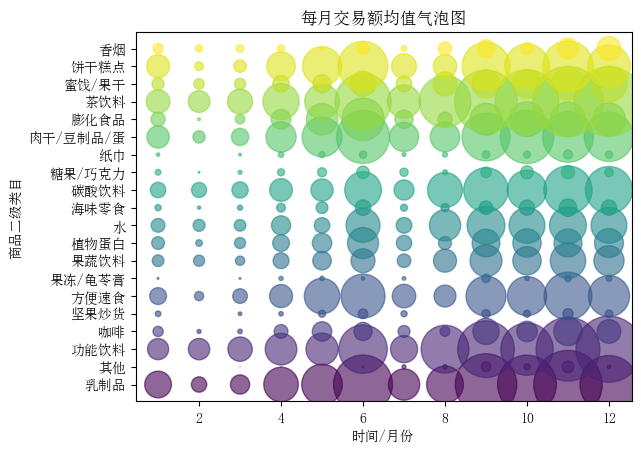

In [74]:
# 绘制气泡图
plt.scatter(sorted_merged_data_sum_filled['Month'], sorted_merged_data_sum_filled['二级类'], s=sorted_merged_data_sum_filled['日均交易额']*10, c=sorted_merged_data_sum_filled['二级类'].astype('category').cat.codes, cmap='viridis', alpha=0.6)

# 设置图表标题和标签
plt.title('每月交易额均值气泡图')
plt.xlabel('时间/月份')
plt.ylabel('商品二级类目')
file_name = f"task2-4.png"
plt.savefig(file_name, format="png")
# 显示气泡图
plt.show()

## 任务2.5 绘制售货机C 6、7、8三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位。从热力图可以分析得出哪些结论？

In [34]:
data_C = pd.read_csv('task1-1C.csv', encoding="GB2312")

# 将支付时间列转换为日期时间类型，处理无效日期
data_C['DateTime'] = pd.to_datetime(data_C['支付时间'], errors='coerce')

# 筛选出2017年6-8月的数据
data_summer = data_C[(data_C['DateTime'].dt.year == 2017) & data_C['DateTime'].dt.month.isin([6, 7, 8])]
print(data_summer)

                                订单号             设备ID  应付金额  实际金额           商品  \
2372  DD201708167493190200943961687  E43A6E078A04228   4.5   4.5  250ml燕塘原味酸奶   
2373  DD201708167493799180409139687  E43A6E078A04228   3.0   3.0   250ml维他柠檬茶   
2374  DD201708167493851537251506863  E43A6E078A04228   2.5   2.5  250ml维他原味豆奶   
2375  DD201708167493466182213051057  E43A6E078A04228   1.5   1.5   40g双汇玉米热狗肠   
2376  DD2017080714235691BC8FE04C389  E43A6E078A04228   5.0   5.0        阿萨姆奶茶   
...                             ...              ...   ...   ...          ...   
6272  DD2017060212071995A0524135DC1  E43A6E078A04228   3.0   3.0        雪碧最新款   
6273  DD201706021211457340FA4CB1BFA  E43A6E078A04228   3.0   3.0        雪碧最新款   
6274  DD2017060212391450B15F2FECF24  E43A6E078A04228   3.0   3.0        卫龙大面筋   
6275  DD20170602175540312037BE1452C  E43A6E078A04228  10.0  10.0     口味王槟榔（绿）   
6276  DD2017060218000433060E190DC69  E43A6E078A04228   4.0   4.0        阿萨姆奶茶   

                 支付时间 地点   

C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3346619335.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_summer.loc[:, 'Day'] = data_summer['DateTime'].dt.day
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\3346619335.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_summer.loc[:, 'Hour'] = data_summer['DateTime'].dt.hour


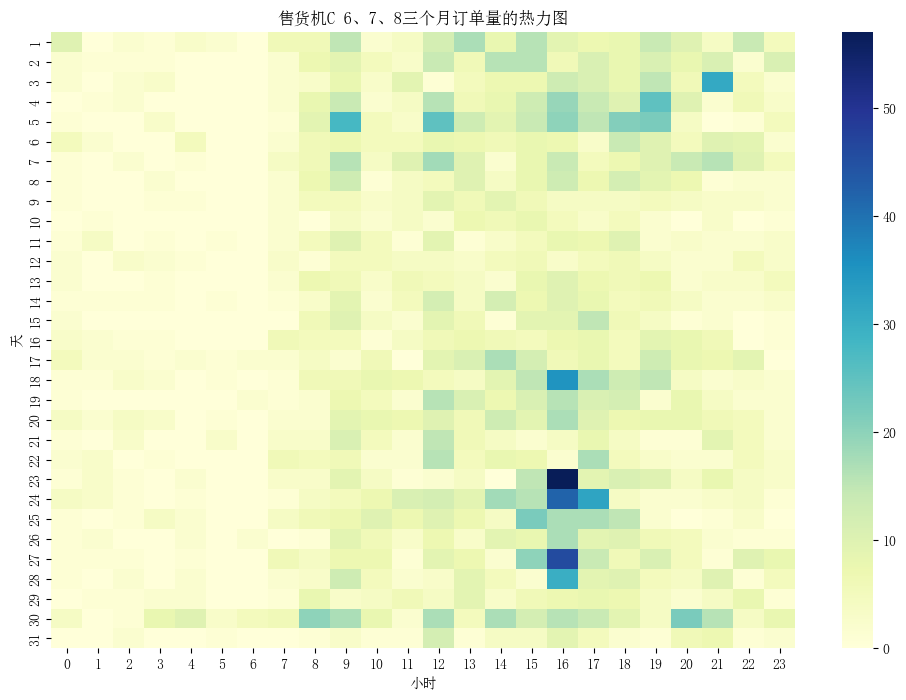

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 将支付时间列转换为日期时间类型
data_C['DateTime'] = pd.to_datetime(data_C['支付时间'], errors='coerce')

# 筛选出2017年6-8月的数据
data_summer = data_C[(data_C['DateTime'].dt.year == 2017) & data_C['DateTime'].dt.month.isin([6, 7, 8])]

# 提取日期中的天和时间中的小时
data_summer.loc[:, 'Day'] = data_summer['DateTime'].dt.day
data_summer.loc[:, 'Hour'] = data_summer['DateTime'].dt.hour

# 使用 pivot_table 方法重新排列数据
heatmap_data = data_summer.pivot_table(index='Day', columns='Hour', values='订单号', aggfunc='count', fill_value=0)

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('售货机C 6、7、8三个月订单量的热力图')
plt.xlabel('小时')
plt.ylabel('天')
file_name = f"task2-5.png"
plt.savefig(file_name, format="png")
plt.show()


# 任务三、生成自助售货机画像

## 任务3.1 分析各售货机商品销售数据，总结规律，给出每台售货机饮料类商品标签，结果保存在CSV文件中，文件名分别为“task3-1A.csv”、“task3-1B.csv”、...、“task3-1E.csv”，格式如下表所示
序号，饮料类商品，标签
1，益力多100g* 5瓶，滞销/正常/热销 
2，旺仔牛奶，滞销/正常/热销 
3，键能酸奶，滞销/正常/热销 
4，东鹏特饮，滞销/正常/热销 

In [36]:
import pandas as pd

# 假设“location_list”在代码中已定义

# 根据产品名称合并数据集
merged_data = pd.merge(data, product_data, on='商品', how='left')

# 选择相关列，并按类别筛选
selected_data = merged_data[(merged_data['大类'] == '饮料')][['商品', '大类', '实际金额', '地点']]

# 计算每种产品在每个地点的销售数量和销售额
sales_quantity = selected_data.groupby(['商品', '地点']).size()
sales_amount = selected_data.groupby(['商品', '地点'])['实际金额'].sum()

# 计算阈值（例如，使用销售数量的均值）
threshold = sales_quantity.mean()

# 创建一个包含销售数据和标签的新数据框
data_3_1 = []
for i, ((product, location), value) in enumerate(sales_quantity.items()):
    label = '热销' if value > threshold else ('滞销' if value < 0.5 * threshold else '正常')
    data_3_1.append({ '饮料类商品': product, '地点': location, '销售数量': value, '标签': label})
df = pd.DataFrame(data_3_1)

# 扩展数据框以填充每种产品缺失的地点
expanded_data = []

for category in df['饮料类商品'].unique():
    category_data = df[df['饮料类商品'] == category]
    for location in location_list:
        if location not in category_data['地点'].values:
            new_row = {'饮料类商品': category, '地点': location, '销售数量': 0, '标签': '滞销'}
            category_data = category_data.append(new_row, ignore_index=True)
    expanded_data.append(category_data)

# 将扩展后的数据合并为一个DataFrame
expanded_df = pd.concat(expanded_data, ignore_index=True)

# 将每个地点的筛选数据保存到CSV文件
for location in location_list:
    selected_data = expanded_df[expanded_df['地点'] == location]
    df_labels = selected_data[['饮料类商品', '标签']]
    
    # 重新设置索引并重命名序号列
    df_labels.reset_index(drop=True, inplace=True)
    df_labels.index += 1
    df_labels.rename_axis('序号', inplace=True)
    
    # 保存到CSV文件
    df_labels.to_csv(f'task3-1{location}.csv', encoding="GB2312")

C:\Users\57411\AppData\Local\Temp\ipykernel_17192\1499816250.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(new_row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\1499816250.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(new_row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\1499816250.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_data = category_data.append(new_row, ignore_index=True)
C:\Users\57411\AppData\Local\Temp\ipykernel_17192\1499816250.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

## 任务3.2 在任务3.1的基础上进行标签拓展，依据标签生成完整的售货机画像，结果保存在CSV文件中，文件名分别为“task3-2A.csv”、“task3-2B.csv”、...、“task3-2E.csv”。依据此画像进行总结描述，给出营销意见。

In [50]:
for location in location_list:
    selected_data = expanded_df[expanded_df['地点'] == location]
    
    # 根据标签和售货机类型生成售货机画像
    # 这里使用示例代码作为演示，你需要根据具体情况进行进一步处理
    vending_profile = selected_data.groupby(['标签','地点']).size().unstack(fill_value=0)
    
    # 将售货机画像保存到CSV文件
    filename = f'task3-2{location}.csv'
    vending_profile.to_csv(filename, encoding="GB2312")

In [52]:
df_labels

,饮料类商品,标签
序号,,
1,100g*5瓶益力多,正常
2,13g雀巢咖啡1+2特浓,滞销
3,145ml旺仔牛奶盒装,热销
4,145ml旺仔牛奶罐装,滞销
5,150g健能酸奶原味,正常
...,...,...
114,雪力矿泉水,滞销
115,雪碧,滞销
116,雪碧330ml,热销


In [54]:
!pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 276.7 kB/s eta 0:00:00


In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 假设 location_list 是包含地点信息的列表
location_list = ['A', 'B', 'C', 'D', 'E']

for location in location_list:
    selected_data = expanded_df[expanded_df['地点'] == location]

    wordcloud_data = selected_data[['饮料类商品', '销售数量']].groupby('饮料类商品').sum().reset_index()

    # 构建带权重的商品名称字典
    word_weights = dict(zip(wordcloud_data['饮料类商品'], wordcloud_data['销售数量']))

    # 生成词云对象，并根据权重生成词云图
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simsun.ttc', collocations=False).generate_from_frequencies(word_weights)

    # 使用 matplotlib 展示词云图
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

    # 将词云图保存为文件
    file_name = f"task3-2{location}.png"
    plt.savefig(file_name, format="png")
    plt.close()
